Самые необходимые пакеты. `numpy` – быстрые вычесления (написан на C и Fortrn), `pandas` – как R-овские DataFrame и data.table, `matplotlib` – очень гибкая штука для графиков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Считываем csv-шки в память

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Смотрим самые важные вещи про данные: размер, примерный вид.

In [3]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (26729, 10)
Test shape: (11456, 8)


In [6]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [7]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


Отбросим лишние колонки, которые мы не можем использовать в анализе.

In [8]:
outcome = train.OutcomeType

In [10]:
outcome.value_counts(normalize=True)

Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: OutcomeType, dtype: float64

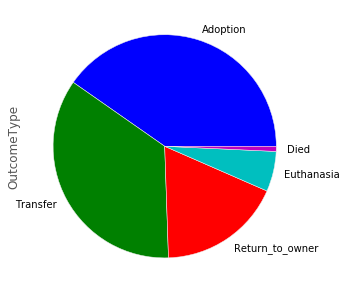

In [13]:
outcome.value_counts().plot(kind='pie', figsize=(5,5))

In [14]:
train.drop(['AnimalID', 'OutcomeType', 'OutcomeSubtype'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

In [15]:
train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [16]:
test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


Объеденим таблички в один датасет, чтобы проводить преобразования колонок одновременно. Создадим дополнительную колонку Test.

In [17]:
train['Test'] = False
test['Test'] = True

In [20]:
data = pd.concat([train, test], ignore_index=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38185 entries, 0 to 38184
Data columns (total 8 columns):
Name              27269 non-null object
DateTime          38185 non-null object
AnimalType        38185 non-null object
SexuponOutcome    38184 non-null object
AgeuponOutcome    38161 non-null object
Breed             38185 non-null object
Color             38185 non-null object
Test              38185 non-null bool
dtypes: bool(1), object(7)
memory usage: 2.4+ MB


Очеь важная характеристика датасета – наличие NA.

In [24]:
data.isnull().sum()

Name              10916
DateTime              0
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       24
Breed                 0
Color                 0
Test                  0
dtype: int64

Построим какие-нибудь картинки.

In [25]:
data.AnimalType.value_counts()

Dog    22251
Cat    15934
Name: AnimalType, dtype: int64

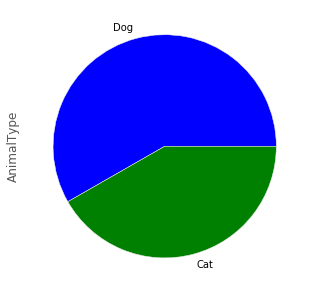

In [28]:
data.AnimalType.value_counts().plot(,'pie' figsize=(5,5))

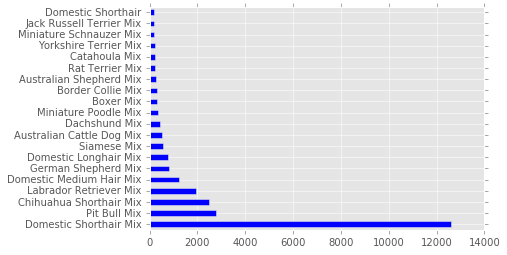

In [34]:
data.Breed.value_counts()[:20].plot(kind='barh')

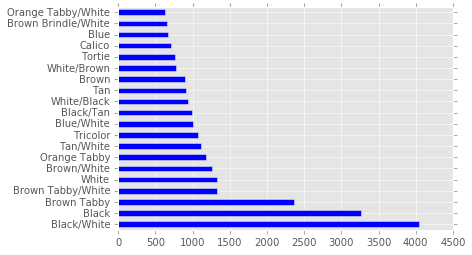

In [37]:
data.Color.value_counts()[:20].plot(kind='barh')

Начнем вариать фичи. Самое простое – вид животного:

In [42]:
data['IsDog'] = (data.AnimalType == 'Dog').astype(int)

In [43]:
data.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Test,IsDog
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,1
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,1
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,0
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1


In [44]:
data.drop('AnimalType', axis=1, inplace=True)

Сложнее - возраст

In [47]:
data.AgeuponOutcome.str.split().str[1].unique()

array(['year', 'years', 'weeks', 'month', 'months', 'days', 'week', 'day',
       nan], dtype=object)

Да, настоящие год – 365.25, а месяц – 30.43. А зная даты, можно найти убрать еще и эту неопределенность.

In [48]:
digit = data.AgeuponOutcome.str.split().str[0].astype(float)
calen = data.AgeuponOutcome.str.split().str[1].str.rstrip('s').replace({'year':365, 'month':30, 'week':7, 'day':1})

In [49]:
digit.head()

0    1
1    1
2    2
3    3
4    2
dtype: float64

In [50]:
calen.head()

0    365
1    365
2    365
3      7
4    365
dtype: float64

In [51]:
data['Age']  = digit*calen

In [52]:
data.head()

,Name,DateTime,SexuponOutcome,AgeuponOutcome,Breed,Color,Test,IsDog,Age
0,Hambone,2014-02-12 18:22:00,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,1,365
1,Emily,2013-10-13 12:44:00,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0,365
2,Pearce,2015-01-31 12:28:00,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,1,730
3,NaN,2014-07-11 19:09:00,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,0,21
4,NaN,2013-11-15 12:52:00,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1,730


Не все так хорошо

In [53]:
data[data.Age == 0]

,Name,DateTime,SexuponOutcome,AgeuponOutcome,Breed,Color,Test,IsDog,Age
280,NaN,2014-04-25 15:17:00,Unknown,0 years,Domestic Shorthair Mix,Blue,False,0,0
1734,NaN,2015-03-21 11:17:00,Unknown,0 years,Domestic Shorthair Mix,Brown Tabby,False,0,0
2474,NaN,2014-05-13 13:20:00,Unknown,0 years,Domestic Shorthair Mix,Cream Tabby,False,0,0
3195,NaN,2015-05-10 18:36:00,Intact Female,0 years,Domestic Longhair Mix,White/Brown Tabby,False,0,0
4051,NaN,2014-04-29 12:35:00,Unknown,0 years,Domestic Shorthair Mix,Black,False,0,0
4209,NaN,2014-04-07 18:59:00,Intact Female,0 years,Domestic Shorthair Mix,White/Blue,False,0,0
4398,NaN,2013-11-04 14:59:00,Intact Female,0 years,Beagle/Chihuahua Shorthair,White,False,1,0
5256,NaN,2014-04-25 15:18:00,Unknown,0 years,Domestic Shorthair Mix,Brown Tabby,False,0,0
5443,NaN,2014-05-13 13:20:00,Unknown,0 years,Domestic Shorthair Mix,Black,False,0,0
7609,NaN,2015-05-03 17:28:00,Unknown,0 years,Domestic Shorthair Mix,Tortie,False,0,0


In [54]:
data.drop('AgeuponOutcome', axis=1, inplace=True)

In [55]:
data.loc[data.Age == 0, 'Age'] = np.nan # 365/2

In [58]:
data.isnull().sum()/len(data)

Name              0.285871
DateTime          0.000000
SexuponOutcome    0.000026
Breed             0.000000
Color             0.000000
Test              0.000000
IsDog             0.000000
Age               0.001545
dtype: float64

In [62]:
data.Age.groupby(data.IsDog).mean()

IsDog
0    495.107579
1    999.463399
Name: Age, dtype: float64

Обработаем имена

In [63]:
data.head()

,Name,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age
0,Hambone,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365
1,Emily,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365
2,Pearce,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730
3,NaN,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21
4,NaN,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730


In [64]:
data['HasName'] = (~data.Name.isnull()).astype(int)

In [65]:
data.loc[data.Name.isnull(), 'Name'] = 'Unknown'

In [67]:
data['NameLength'] = data.Name.apply(len)

In [68]:
data.head()

,Name,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age,HasName,NameLength
0,Hambone,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365,1,7
1,Emily,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365,1,5
2,Pearce,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730,1,6
3,Unknown,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21,0,7
4,Unknown,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730,0,7


In [73]:
name_freq = data.Name.value_counts(normalize=True).to_dict()
data['NameFreq'] = data.Name.apply(lambda x: name_freq[x])

In [78]:
data.drop('Name', axis=1, inplace=True)

In [79]:
data.head()

,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq
0,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365,1,7,0.000157
1,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365,1,5,0.000655
2,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730,1,6,0.000052
3,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21,0,7,0.285871
4,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730,0,7,0.285871


Пол

In [80]:
data.SexuponOutcome.value_counts()

Neutered Male    14014
Spayed Female    12633
Intact Female     5004
Intact Male       4985
Unknown           1548
Name: SexuponOutcome, dtype: int64

In [81]:
data.loc[data.SexuponOutcome.isnull(), 'SexuponOutcome'] = 'Unknown'

In [82]:
data['Sex'] = data.SexuponOutcome.str.split().str[-1]

In [83]:
data['SexStatus'] = data.SexuponOutcome.str.split().str[0].replace({'Neutered': 'Flawed', 'Spayed': 'Flawed'})

In [84]:
data.head()

,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq,Sex,SexStatus
0,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365,1,7,0.000157,Male,Flawed
1,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365,1,5,0.000655,Female,Flawed
2,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730,1,6,0.000052,Male,Flawed
3,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21,0,7,0.285871,Male,Intact
4,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730,0,7,0.285871,Male,Flawed


In [85]:
data.Age.groupby(data.SexStatus).mean()

SexStatus
Flawed     917.566710
Intact     531.967771
Unknown    227.732413
Name: Age, dtype: float64

In [86]:
data.drop('SexuponOutcome', axis=1, inplace=True)

In [87]:
data.head()

,DateTime,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq,Sex,SexStatus
0,2014-02-12 18:22:00,Shetland Sheepdog Mix,Brown/White,False,1,365,1,7,0.000157,Male,Flawed
1,2013-10-13 12:44:00,Domestic Shorthair Mix,Cream Tabby,False,0,365,1,5,0.000655,Female,Flawed
2,2015-01-31 12:28:00,Pit Bull Mix,Blue/White,False,1,730,1,6,0.000052,Male,Flawed
3,2014-07-11 19:09:00,Domestic Shorthair Mix,Blue Cream,False,0,21,0,7,0.285871,Male,Intact
4,2013-11-15 12:52:00,Lhasa Apso/Miniature Poodle,Tan,False,1,730,0,7,0.285871,Male,Flawed


Займемся цветом

In [88]:
data['MixColor'] = data.Color.str.contains('/').astype(int)

In [89]:
color_freq = data.Color.value_counts(normalize=True).to_dict()
data['ColorFreqAsIs'] = data.Color.apply(lambda x: color_freq[x])

* Проверить B/W == W/B
* Отдельно анализировать Cream, Tabby

In [92]:
colors = [color.split()[0] for pair in data.Color.str.split('/') for color in pair]

In [94]:
base_color_freq = pd.Series(colors).value_counts(normalize=True).to_dict()

In [95]:
data['ColorFreqBase'] = data.Color.apply(lambda x: sum(base_color_freq[color.split()[0]] for color in x.split('/')))

In [98]:
data['TabbyColor'] = data.Color.str.contains('Tabby')

In [99]:
data.drop('Color', axis=1, inplace=True)

Породы - сделаем похожим образом

In [101]:
data['MixBreed'] = data.Breed.str.endswith('Mix').astype(int)
data['Domestic'] = data.Breed.str.contains('Domestic').astype(int)
data['Shorthair'] = data.Breed.str.contains('Shorthair').astype(int)
data['Longhair'] = data.Breed.str.contains('Longhair').astype(int)

In [104]:
data.Breed.value_counts(normalize=True).cumsum()[:10]

Domestic Shorthair Mix       0.329632
Pit Bull Mix                 0.402331
Chihuahua Shorthair Mix      0.467749
Labrador Retriever Mix       0.518790
Domestic Medium Hair Mix     0.550661
German Shepherd Mix          0.572398
Domestic Longhair Mix        0.592117
Siamese Mix                  0.606835
Australian Cattle Dog Mix    0.620270
Dachshund Mix                0.631714
Name: Breed, dtype: float64

In [105]:
freq_breeds = set(data.Breed.value_counts()[:6].index)

In [106]:
data['Breed'] = data.Breed.apply(lambda x: x if x in freq_breeds else 'Rare')

Даты...

In [108]:
dates = data.DateTime.astype(np.datetime64)

In [110]:
data['Year'] = dates.apply(lambda x: x.year)
data['Month'] = dates.apply(lambda x: x.month)
data['Day'] = dates.apply(lambda x: x.day)
data['Hour'] = dates.apply(lambda x: x.hour + x.minute/60)
data['Weekday'] = dates.apply(lambda x: x.weekday())

In [111]:
data.drop('DateTime', axis=1, inplace=True)

Категории в бинарные фичи

In [113]:
data = pd.get_dummies(data, columns=['Breed', 'Sex', 'SexStatus', 'Weekday'])

In [114]:
data.head()

,Test,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,...,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,False,1,365,1,7,0.000157,1,0.032919,0.463624,False,...,1,0,0,0,0,1,0,0,0,0
1,False,0,365,1,5,0.000655,0,0.008092,0.015005,True,...,1,0,0,0,0,0,0,0,0,1
2,False,1,730,1,6,0.000052,1,0.026293,0.357521,False,...,1,0,0,0,0,0,0,0,1,0
3,False,0,21,0,7,0.285871,0,0.000471,0.058418,False,...,0,1,0,0,0,0,0,1,0,0
4,False,1,730,0,7,0.285871,0,0.023831,0.075353,False,...,1,0,0,0,0,0,0,1,0,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38185 entries, 0 to 38184
Data columns (total 38 columns):
Test                              38185 non-null bool
IsDog                             38185 non-null int64
Age                               38126 non-null float64
HasName                           38185 non-null int64
NameLength                        38185 non-null int64
NameFreq                          38185 non-null float64
MixColor                          38185 non-null int64
ColorFreqAsIs                     38185 non-null float64
ColorFreqBase                     38185 non-null float64
TabbyColor                        38185 non-null bool
MixBreed                          38185 non-null int64
Domestic                          38185 non-null int64
Shorthair                         38185 non-null int64
Longhair                          38185 non-null int64
Year                              38185 non-null int64
Month                             38185 non-null int64
Day  

In [116]:
data.describe()

,Test,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,...,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
count,38185,38185.000000,38126.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185,...,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000
mean,0.300013,0.582716,789.312936,0.714129,5.985020,0.082154,0.520152,0.035830,0.256684,0.193898,...,0.697839,0.261595,0.040566,0.142648,0.142438,0.130758,0.125913,0.133351,0.162734,0.162158
std,0.458269,0.493117,1080.273944,0.451834,1.539866,0.128896,0.499600,0.033187,0.173034,0.395355,...,0.459200,0.439509,0.197284,0.349718,0.349504,0.337140,0.331756,0.339958,0.369128,0.368600
min,False,0.000000,1.000000,0.000000,1.000000,0.000026,0.000000,0.000026,0.000052,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0,0.000000,60.000000,0.000000,5.000000,0.000105,0.000000,0.012413,0.075353,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0,1.000000,365.000000,1.000000,6.000000,0.000576,1.000000,0.024748,0.274622,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1,1.000000,1095.000000,1.000000,7.000000,0.285871,1.000000,0.061778,0.463624,0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,True,1.000000,8030.000000,1.000000,12.000000,0.285871,1.000000,0.105879,0.598205,True,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


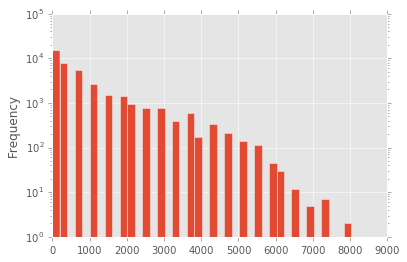

In [121]:
data.Age.plot(kind='hist', logy=True, bins=40)

In [124]:
import scipy.stats as ss

In [128]:
ss.pearsonr(data.Test, data.NameFreq)

(-0.0063329121064223037, 0.21590702483708604)

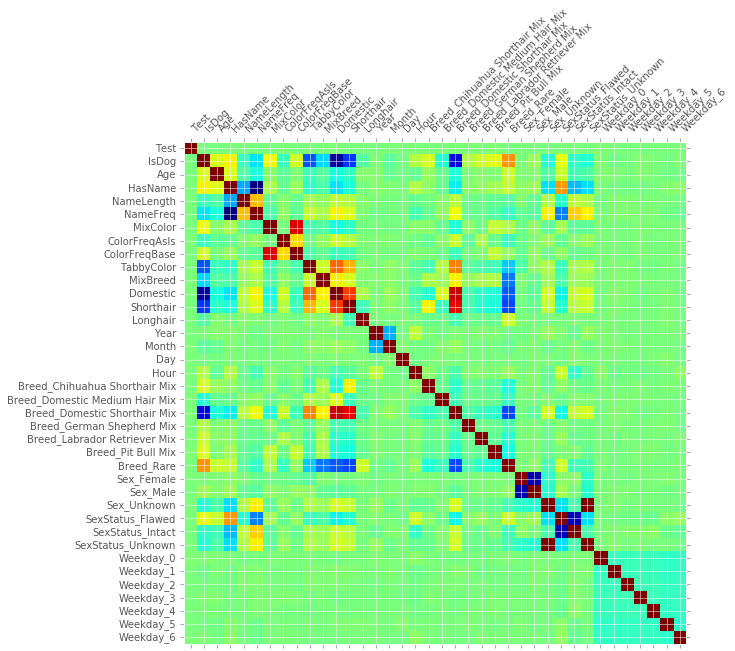

In [129]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(data.corr(), vmin=-1, vmax=1)
plt.yticks(range(data.shape[1]), data.columns)
plt.xticks(range(data.shape[1]), data.columns, rotation=45, ha="left" )
plt.show()

Чуть-чуть оптимизируем память

In [134]:
for col in data.columns:
    if set(data[col]) == set((0,1)):
        data[col] = data[col].astype(np.int8)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38185 entries, 0 to 38184
Data columns (total 38 columns):
Test                              38185 non-null int8
IsDog                             38185 non-null int8
Age                               38126 non-null float64
HasName                           38185 non-null int8
NameLength                        38185 non-null int64
NameFreq                          38185 non-null float64
MixColor                          38185 non-null int8
ColorFreqAsIs                     38185 non-null float64
ColorFreqBase                     38185 non-null float64
TabbyColor                        38185 non-null int8
MixBreed                          38185 non-null int8
Domestic                          38185 non-null int8
Shorthair                         38185 non-null int8
Longhair                          38185 non-null int8
Year                              38185 non-null int64
Month                             38185 non-null int64
Day         

Исправим NA-шки

In [136]:
data.isnull().sum()

Test                               0
IsDog                              0
Age                               59
HasName                            0
NameLength                         0
NameFreq                           0
MixColor                           0
ColorFreqAsIs                      0
ColorFreqBase                      0
TabbyColor                         0
MixBreed                           0
Domestic                           0
Shorthair                          0
Longhair                           0
Year                               0
Month                              0
Day                                0
Hour                               0
Breed_Chihuahua Shorthair Mix      0
Breed_Domestic Medium Hair Mix     0
Breed_Domestic Shorthair Mix       0
Breed_German Shepherd Mix          0
Breed_Labrador Retriever Mix       0
Breed_Pit Bull Mix                 0
Breed_Rare                         0
Sex_Female                         0
Sex_Male                           0
S

In [137]:
data.Age.median()

365.0

Можно просто записать туда медиану, а можно построить какую-нибудь модельку.

In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [139]:
X = data.ix[~data.Age.isnull(), data.columns != 'Age']
y = data.ix[~data.Age.isnull(), 'Age']

In [140]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
lr.coef_

array([ -1.86842545e+01,   1.37235382e+02,   9.67545429e+03,
         3.75543343e+00,   3.26229309e+04,  -3.18688913e+01,
        -4.36980312e+02,  -1.27475270e+02,  -4.59035595e+01,
         4.14502989e+01,   1.68697355e+00,  -1.61338889e+02,
         8.27220825e+01,   3.79522368e+01,  -8.67283433e+00,
        -1.00676204e+00,  -4.02732928e+01,  -1.38667931e+12,
        -1.38667931e+12,  -1.38667931e+12,  -1.38667931e+12,
        -1.38667931e+12,  -1.38667931e+12,  -1.38667931e+12,
         1.90589185e+13,   1.90589185e+13,   3.85655645e+12,
        -1.13355280e+13,  -1.13355280e+13,   3.86683408e+12,
        -1.20863557e+12,  -1.20863557e+12,  -1.20863557e+12,
        -1.20863557e+12,  -1.20863557e+12,  -1.20863557e+12,
        -1.20863557e+12])

In [142]:
pd.Series(lr.coef_, index=data.columns[data.columns!='Age']).sort_values()

SexStatus_Intact                 -1.133553e+13
SexStatus_Flawed                 -1.133553e+13
Breed_Domestic Medium Hair Mix   -1.386679e+12
Breed_Pit Bull Mix               -1.386679e+12
Breed_German Shepherd Mix        -1.386679e+12
Breed_Domestic Shorthair Mix     -1.386679e+12
Breed_Labrador Retriever Mix     -1.386679e+12
Breed_Rare                       -1.386679e+12
Breed_Chihuahua Shorthair Mix    -1.386679e+12
Weekday_5                        -1.208636e+12
Weekday_6                        -1.208636e+12
Weekday_2                        -1.208636e+12
Weekday_4                        -1.208636e+12
Weekday_0                        -1.208636e+12
Weekday_1                        -1.208636e+12
Weekday_3                        -1.208636e+12
ColorFreqAsIs                    -4.369803e+02
Shorthair                        -1.613389e+02
ColorFreqBase                    -1.274753e+02
TabbyColor                       -4.590356e+01
Hour                             -4.027329e+01
MixColor     

In [148]:
agepred = np.maximum(lr.predict(data.ix[data.Age.isnull(), data.columns != 'Age']), 7)

In [149]:
data.ix[data.Age.isnull(), 'Age'] = agepred

In [150]:
train = data[data.Test == 0].drop('Test', axis=1).copy()
test = data[data.Test == 1].drop('Test', axis=1).copy()

In [152]:
train.to_pickle('data/train_prep.pkl')
test.to_pickle('data/test_prep.pkl')